# Implementing deep neural network (DNN) with Theano

In [1]:
# Make it work with python2 as well
from __future__ import print_function, division
from builtins import range

# Needed imports
import theano.tensor as T
import numpy as np
import matplotlib.pyplot as plt
import theano


### Creating synthetic data

Shape of X1, X2, X3 respectively (1000, 2) (1000, 2) (1000, 2)
XX.shape = (3000, 2) , YY.shape = (3000,)
Z.shape = (3000, 3)


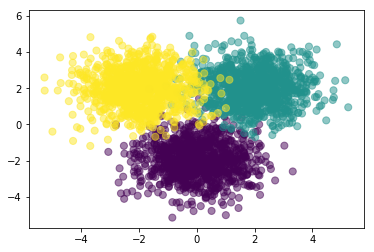

In [2]:
# Create a dataset with 3 catagories having 1000 samples each. Each sample is labeled with its catagory indicator.

# Number of Catagories
numCatag = 3
# Number of samples per class
Nclass = 1000
np.random.seed(1)

X1 = np.random.randn(Nclass, 2) + np.array([0, -2]) # sift distribution center to (0, -2)
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])  # sift distribution center to (2, 2)
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2]) # sift distribution center to (-2, 2)
print("Shape of X1, X2, X3 respectively", X1.shape, X2.shape, X3.shape)

# Vertically stack these samples to create dataset of 1500 samples.
XX = np.vstack([X1, X2, X3])

# Populate labels for all samples
YY = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
print("XX.shape =", XX.shape, ", YY.shape =", YY.shape)

Z = np.hstack( (XX, YY.reshape(XX.shape[0], 1)) ) # pass a tuple
print("Z.shape =", Z.shape)

# let's see what it looks like
plt.scatter(Z[:,0], Z[:,1], c=Z[:,2], s=50, alpha=0.5)
plt.show()


### Prepare data for learning

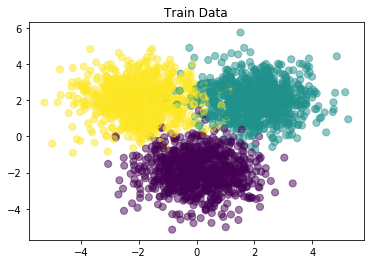

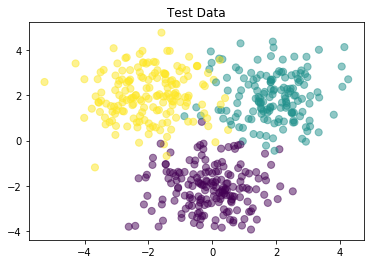

Ytrain_ind.shape = (2500, 3) Ytest_ind.shape = (500, 3)
Ytrain_ind[0] = [0. 1. 0.] Ytest_ind[0] = [0. 1. 0.]


In [3]:
# Convert columar indicator vector to binary indicator matrix.
# Ex. Y = [2, 1, 0]
# return T = [[0, 0, 1], [0, 1, 0], [1, 0, 0]]
def conv_indicator_to_matrix(Y, numClasses):
    N = len(Y)
    T = np.zeros((N, numClasses))
    for i in range(N):
        T[i, int(Y[i])] = 1
    return T

# shuffle the data
np.random.shuffle(Z)

# get the data
X, Y = Z[:, :-1], Z[:, 2].astype(np.int32)
Xtrain, Ytrain = X[:-500], Y[:-500]
Xtest, Ytest = X[-500:], Y[-500:]

Xtrain = Xtrain.astype(np.float32)
Xtest = Xtest.astype(np.float32)
Ytrain_ind = conv_indicator_to_matrix(Ytrain, numCatag).astype(np.float32)
Ytest_ind = conv_indicator_to_matrix(Ytest, numCatag).astype(np.float32)

# let's see how train and set set look like
plt.scatter(Xtrain[:,0], Xtrain[:,1], c=Ytrain, s=50, alpha=0.5)
plt.title("Train Data")
plt.show()
plt.scatter(Xtest[:,0], Xtest[:,1], c=Ytest, s=50, alpha=0.5)
plt.title("Test Data")
plt.show()
print("Ytrain_ind.shape =", Ytrain_ind.shape, "Ytest_ind.shape =", Ytest_ind.shape)
print("Ytrain_ind[0] =", Ytrain_ind[0], "Ytest_ind[0] =", Ytest_ind[0])

### Defining the deep neural network (DNN) with one hidden layer

In [17]:
# D is number of parameters in input.
# so, D is also number of nodes in the input layer.
N, D = Xtrain.shape
M = 30 # Number of nodes in middle layer
# Number of nodes in output layer
# This is equal to number of catagories in the data
K = numCatag

# Initial weights and bias for middle and output layer
W1_init = np.random.randn(D, M) / np.sqrt(D)
b1_init = np.zeros(M)
W2_init = np.random.randn(M, K) / np.sqrt(M)
b2_init = np.zeros(K)

# define theano variables for inputs.
thX = T.matrix('X')
thY = T.matrix('Y')

# Shared variable for neural network weights. These are updated by theano during training.
# These weights are learned during training.
W1 = theano.shared(W1_init, 'W1')
b1 = theano.shared(b1_init, 'b1')
W2 = theano.shared(W2_init, 'W2')
b2 = theano.shared(b2_init, 'b2')


# Activation functions - use the built-in theano functions to do relu and softmax.
thZ = T.nnet.relu( thX.dot(W1) + b1 )
thY_bar = T.nnet.softmax( thZ.dot(W2) + b2 )

lr = 0.001
reg = 0.01

# define the cost function and prediction
cost = -(thY * T.log(thY_bar)).sum() + reg*((W1*W1).sum() + (b1*b1).sum() + (W2*W2).sum() + (b2*b2).sum())
prediction = T.argmax(thY_bar, axis=1)

# step 3: training expressions and functions
# we can just include regularization as part of the cost because it is also automatically differentiated!
update_W1 = W1 - lr*T.grad(cost, W1)
update_b1 = b1 - lr*T.grad(cost, b1)
update_W2 = W2 - lr*T.grad(cost, W2)
update_b2 = b2 - lr*T.grad(cost, b2)

train = theano.function(
    inputs=[thX, thY],
    updates=[(W1, update_W1), (b1, update_b1), (W2, update_W2), (b2, update_b2)],
)

# create another function for this because we want it over the whole dataset
get_prediction = theano.function(
    inputs=[thX, thY],
    outputs=[cost, prediction],
)



### Training the neural network 

Cost / err at iteration i=0:	 3175.893 / 0.097
Cost / err at iteration i=10:	 284.392 / 0.029
Cost / err at iteration i=20:	 227.397 / 0.028
Cost / err at iteration i=30:	 205.418 / 0.027
Cost / err at iteration i=40:	 198.937 / 0.026
Cost / err at iteration i=50:	 195.983 / 0.026
Cost / err at iteration i=60:	 193.775 / 0.027
Cost / err at iteration i=70:	 192.186 / 0.026
Cost / err at iteration i=80:	 190.992 / 0.026
Cost / err at iteration i=90:	 190.232 / 0.026
Cost / err at iteration i=100:	 189.655 / 0.026
Cost / err at iteration i=110:	 189.209 / 0.026
Cost / err at iteration i=120:	 188.804 / 0.026
Cost / err at iteration i=130:	 188.432 / 0.026
Cost / err at iteration i=140:	 188.144 / 0.026
Cost / err at iteration i=150:	 187.885 / 0.027
Cost / err at iteration i=160:	 187.691 / 0.027
Cost / err at iteration i=170:	 187.500 / 0.027
Cost / err at iteration i=180:	 187.314 / 0.027
Cost / err at iteration i=190:	 187.156 / 0.027


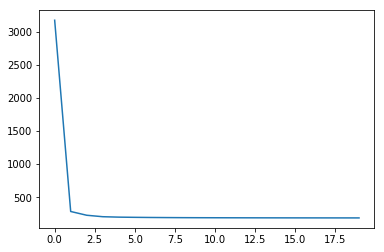

Prediction error with test set = 0.03


In [18]:
def error_rate(p, t):
    return np.mean(p != t)

max_iter = 200
print_period = 10

costs = []
for i in range(max_iter):
    train(Xtrain, Ytrain_ind)
    cost_val, prediction_val = get_prediction(Xtrain, Ytrain_ind)
    err = error_rate(prediction_val, Ytrain)
    if i % print_period == 0:
        costs.append(cost_val)
        print("Cost / err at iteration i=%d:\t %.3f / %.3f" % (i, cost_val, err))

plt.plot(costs)
plt.show()

cost_val, prediction_val = get_prediction(Xtest, Ytest_ind)
err = error_rate(prediction_val, Ytest)
print("Prediction error with test set =", err)